# AI for Earth Penguins Guano Classification API
---

> Demo for the AI for Earth Penguin Guano Classification API. API runs a semantic segmentation pipeline to detect rosy guano patches from penguin colonies in high-resolution satellite imagery using a U-Net variant. API includes a frontent hosted on flask and a backend running a pre-trained U-Net trained on over 4000 images of Adélie penguin colonies. API supports imagery from Google Earth. 

### Notebook contents:

> Brief steps to classify images using  the API and *requests*

1. Setup
2. Helper functions
3. Retrieving and viewing data
4. Classifying through API and viewing results 

Check us out on on [GitHub](https://github.com/iceberg-project/Penguins/tree/devel) for more information about the model behind the API. To learn more about the research behind the model, visit us at [LynchLab.com](https://lynchlab.com/).

Visit the Microsoft AI for Earth [API home page](https://www.microsoft.com/en-us/ai/ai-for-earth-tech-resources) for more information or to request an API key.  

### Setup

In [1]:
# load required packages
import os
import io
import sys
import requests
import random
import matplotlib.pyplot as plt
from PIL import Image

# prevents output from previous run
%autosave 0

# link to communicate with the API through requests
API_ENDPOINT = "http://13.91.136.10580/v1/pytorch_api/classify"

# link to sample images hosted on the repo
SAMPLE_IMAGE_URLS = ['https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/bird1_11_29_12.jpg',
                     'https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/blakwhit1_11_29_1.jpg',
                     'https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/blakwhit2_11_29_1.jpg'
                     'https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/capebatterbee1_18_26_3.jpg',
                     'https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/capebatterbee2_18_26_3.jpg',
                     'https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/delta_12_21_2.jpg',
                     'https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/demo_image1.jpg',
                     'https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/hope2005.jpg',
                     'https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/hope2011_4_2.jpg',
                     'https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/hope2018.jpg',
                     'https://github.com/hlynch/Penguins_AIforEarth/raw/master/Notebooks/demo_images/wheatstone.jpg']


Autosave disabled


### Helper Functions to interact with the API

In [5]:
# retrieves images as bytes from url
def get_image(url):
    
    image_data = requests.get(url) 
    return image_data.content
    
# displays an image
def show_image(img):
    
    img = Image.open(io.BytesIO(img))
    plt.imshow(img)

# classifies an image and returns URL to result
def call_my_api(data):
    
    try:
        r = requests.post(url=API_ENDPOINT, data=data, 
            headers={'Content-Type': 'application/octet-stream'})
        return f'https://icebergblob.blob.core.windows.net/penguinapi/{r.text}'

    except Exception as e:
        print(f'Exception running API: {e}')



### Retrieve and display sample images

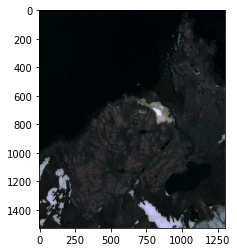

In [3]:
# load sample image at random
testImage = get_image(url=random.choice(SAMPLE_IMAGE_URLS))

# display image
show_image(testImage)

### Call API and show results

In [4]:
# Replace this code with code to call your machine learning model and show results.
response = get_image(call_my_api(testImage))

show_image(response)

Exception running API: HTTPConnectionPool(host='13.91.136.10580', port=80): Max retries exceeded with url: /v1/pytorch_api/classify (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f181826c910>: Failed to establish a new connection: [Errno -2] Name or service not known'))


MissingSchema: Invalid URL 'None': No schema supplied. Perhaps you meant http://None?